In [40]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
from pydub import AudioSegment
import os
import json
import sklearn as skl
import pandas as pd
plt.style.use('dark_background')
AudioSegment.ffmpeg="C:\\ffmpeg\\bin\\ffmpeg.exe"
DATASET_PATH= "Data\\genres_original"
NEW_DATASET_PATH = "Data\\genres_split"
JSON_PATH= "Data\\Json\\Data.Json"
file1="Data\\genres_split\\blues\\blues.00000.0.wav"
file2="Data\\genres_split\\classical\\classical.00000.0.wav"
file3="Data\\genres_split\\metal\\metal.00000.0.wav"
file4="Data\\genres_split\\country\\country.00000.0.wav"
file5="Data\\genres_split\\disco\\disco.00000.0.wav"
file6="Data\\genres_split\\hiphop\\hiphop.00000.0.wav"
file7="Data\\genres_split\\jazz\\jazz.00000.0.wav"
file8="Data\\genres_split\\pop\\pop.00000.0.wav"
file9="Data\\genres_split\\reggae\\reggae.00000.0.wav"
file10="Data\\genres_split\\rock\\rock.00000.0.wav"
SAMPLE_RATE = 22050

In [ ]:
#loop to split 30s songs into 10 different audio files
for dirpath, dirnames, filenames in os.walk(DATASET_PATH):
    # dirpath is a path to the current root folder, dirnames is a list of folders in current root folder, filenames is a list of files in the current root folder
    # making sure that the path is to the root folder with all the music folder
    if dirpath is not DATASET_PATH:
        #pull the genere out from the path
        #I will be splitting the songs and placing them into a new folder
        semantic_label = dirpath.split("\\")[-1]
        if not os.path.isdir(os.path.join(NEW_DATASET_PATH+ f"\\{semantic_label}")):
            print(os.path.isdir(os.path.join(NEW_DATASET_PATH+ f"\\{semantic_label}")))
            print(os.path.join(NEW_DATASET_PATH+ f"\\{semantic_label}"))
            print("Not a folder")
            os.mkdir(os.path.join(NEW_DATASET_PATH,semantic_label))
        for song in filenames:
            current_song= AudioSegment.from_wav(os.path.join(DATASET_PATH + f"\\{semantic_label}" + f"\\{song}"))
            for count, i in enumerate (range (0,30,3)):
                time_stamp1 = (i)*1000
                time_stamp2 = (i+3)*1000
                new_song=current_song[time_stamp1:time_stamp2]
                new_song_name=song[:-3]+f"{count}" 
                if new_song.duration_seconds == 3.0:
                    new_song.export(os.path.join(NEW_DATASET_PATH+ f"\\{semantic_label}"+f"\\{new_song_name}.wav"),format="wav")

In [18]:

def save_data(dataset_path,json_path,n_mfcc=13,n_fft=2048,hop_length=512):
    Data_Set={
        'Genre':[],
        'MFCC':[],
        'Labels':[],
    }
    for i, (dirpath, dirnames, filenames) in enumerate(os.walk(dataset_path)):
    # dirpath is a path to the current root folder, dirnames is a list of folders in current root folder, filenames is a list of files in the current root folder
    # making sure that the path is to the root folder with all the music folder
        if dirpath is not dataset_path:
        #pull the genere out from the path
        #I will be splitting the songs and placing them into a new folder
            semantic_label = dirpath.split("\\")[-1]
            Data_Set["Genre"].append(semantic_label)
            print("Processing Genre: {}".format(semantic_label))

        for song in filenames:
            song_path=os.path.join(dirpath,song)
            signal, sr= librosa.load(song_path, sr=SAMPLE_RATE)
            mfcc =librosa.feature.mfcc(signal,sr=SAMPLE_RATE, n_mfcc=n_mfcc,n_fft=n_fft,hop_length=hop_length)
            mfcc= mfcc.T
            Data_Set['MFCC'].append(mfcc.tolist())
            Data_Set['Labels'].append(i-1)

    with open(json_path, 'w') as j:
        json.dump(Data_Set, j, indent=4)

In [4]:
save_data(NEW_DATASET_PATH,JSON_PATH)]

Processing Genre: blues
Processing Genre: classical
Processing Genre: country
Processing Genre: disco
Processing Genre: hiphop
Processing Genre: jazz
Processing Genre: metal
Processing Genre: pop
Processing Genre: reggae
Processing Genre: rock


Text(0.5, 1.0, 'Genre Count')

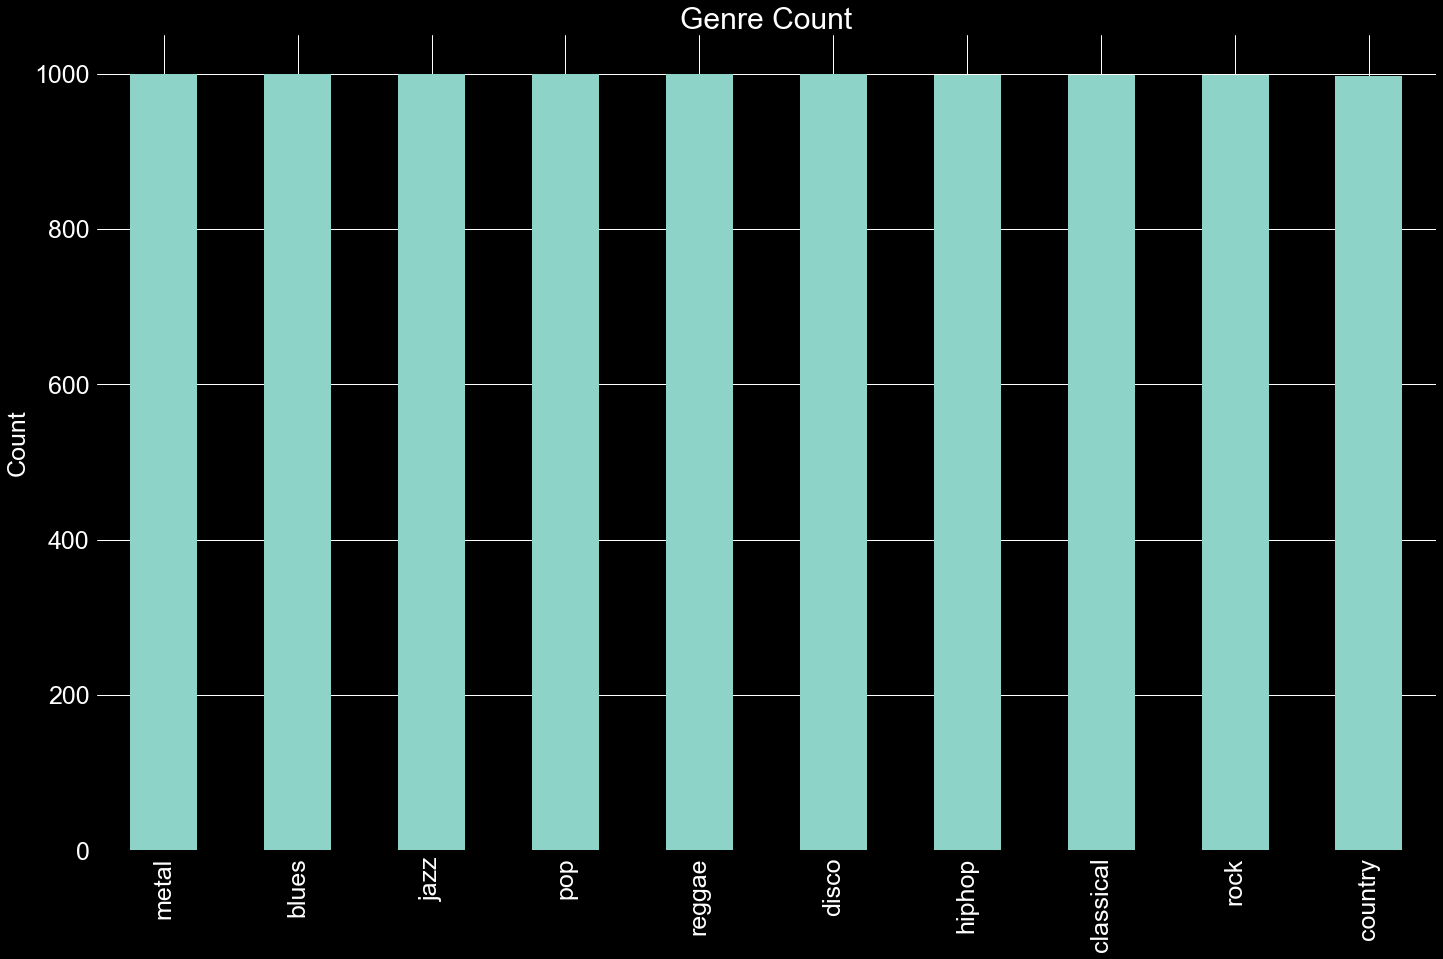

In [41]:
music_data=pd.read_csv("C:\\Users\\curtis\\Desktop\\All\\DataScience\\Data_Science_Project\\archive\\Data\\features_3_sec.csv")
music_data_labels=music_data["label"]
plt.rc('axes', titlesize=30)
plt.rc('axes', labelsize=25)
plt.rc('xtick', labelsize=25)
plt.rc('ytick', labelsize=25) 
plt.figure(figsize=(24,15))
music_data_labels.value_counts().plot(kind='bar')
plt.ylabel("Count")
plt.title("Genre Count")

In [38]:
music_data.describe()

,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
count,9990.0,9990.000000,9990.000000,9990.000000,9.990000e+03,9990.000000,9.990000e+03,9990.000000,9.990000e+03,9990.000000,...,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000
mean,66149.0,0.379534,0.084876,0.130859,2.676388e-03,2199.219431,4.166727e+05,2241.385959,1.182711e+05,4566.076592,...,1.448240,49.988755,-4.198706,51.962753,0.739943,52.488851,-2.497306,54.973829,-0.917584,57.322614
std,0.0,0.090466,0.009637,0.068545,3.585628e-03,751.860611,4.349644e+05,543.854449,1.013505e+05,1642.065335,...,5.735149,34.442816,5.677379,36.400669,5.181313,38.177120,5.111799,41.585677,5.253243,46.444212
min,66149.0,0.107108,0.015345,0.000953,4.379535e-08,472.741636,8.118813e+02,499.162910,1.183520e+03,658.336276,...,-26.850016,1.325786,-27.809795,1.624544,-20.733809,3.437439,-27.448456,3.065302,-35.640659,0.282131
25%,66149.0,0.315698,0.079833,0.083782,6.145900e-04,1630.680158,1.231961e+05,1887.455790,4.876553e+04,3378.311110,...,-2.227478,29.584894,-7.951722,29.863448,-2.516638,29.636197,-5.734123,30.496412,-4.004475,30.011365
50%,66149.0,0.384741,0.085108,0.121253,1.491318e-03,2208.628236,2.650692e+05,2230.575595,8.996072e+04,4631.377892,...,1.461623,41.702393,-4.443021,42.393583,0.733772,41.831377,-2.702366,43.435253,-1.030939,44.332155
75%,66149.0,0.442443,0.091092,0.176328,3.130862e-03,2712.581884,5.624152e+05,2588.340505,1.585674e+05,5591.634521,...,5.149752,59.274619,-0.726945,61.676964,3.888734,62.033906,0.514246,65.328602,2.216603,68.210421
max,66149.0,0.749481,0.120964,0.442567,3.261522e-02,5432.534406,4.794119e+06,3708.147554,1.235143e+06,9487.446477,...,39.144405,683.932556,34.048843,529.363342,36.970322,629.729797,31.365425,1143.230591,34.212101,910.473206


In [12]:
signal,sr=librosa.load(file1,sr=SAMPLE_RATE)
signal2,sr2=librosa.load(file2,sr=SAMPLE_RATE)
signal3,sr3=librosa.load(file3,sr=SAMPLE_RATE)
signal4,sr4=librosa.load(file4,sr=SAMPLE_RATE)
signal5,sr5=librosa.load(file5,sr=SAMPLE_RATE)
signal6,sr6=librosa.load(file6,sr=SAMPLE_RATE)
signal7,sr7=librosa.load(file7,sr=SAMPLE_RATE)
signal8,sr8=librosa.load(file8,sr=SAMPLE_RATE)
signal9,sr9=librosa.load(file9,sr=SAMPLE_RATE)
signal10,sr10=librosa.load(file10,sr=SAMPLE_RATE)

Text(0.5, 1.0, 'Time vs Amplitude')

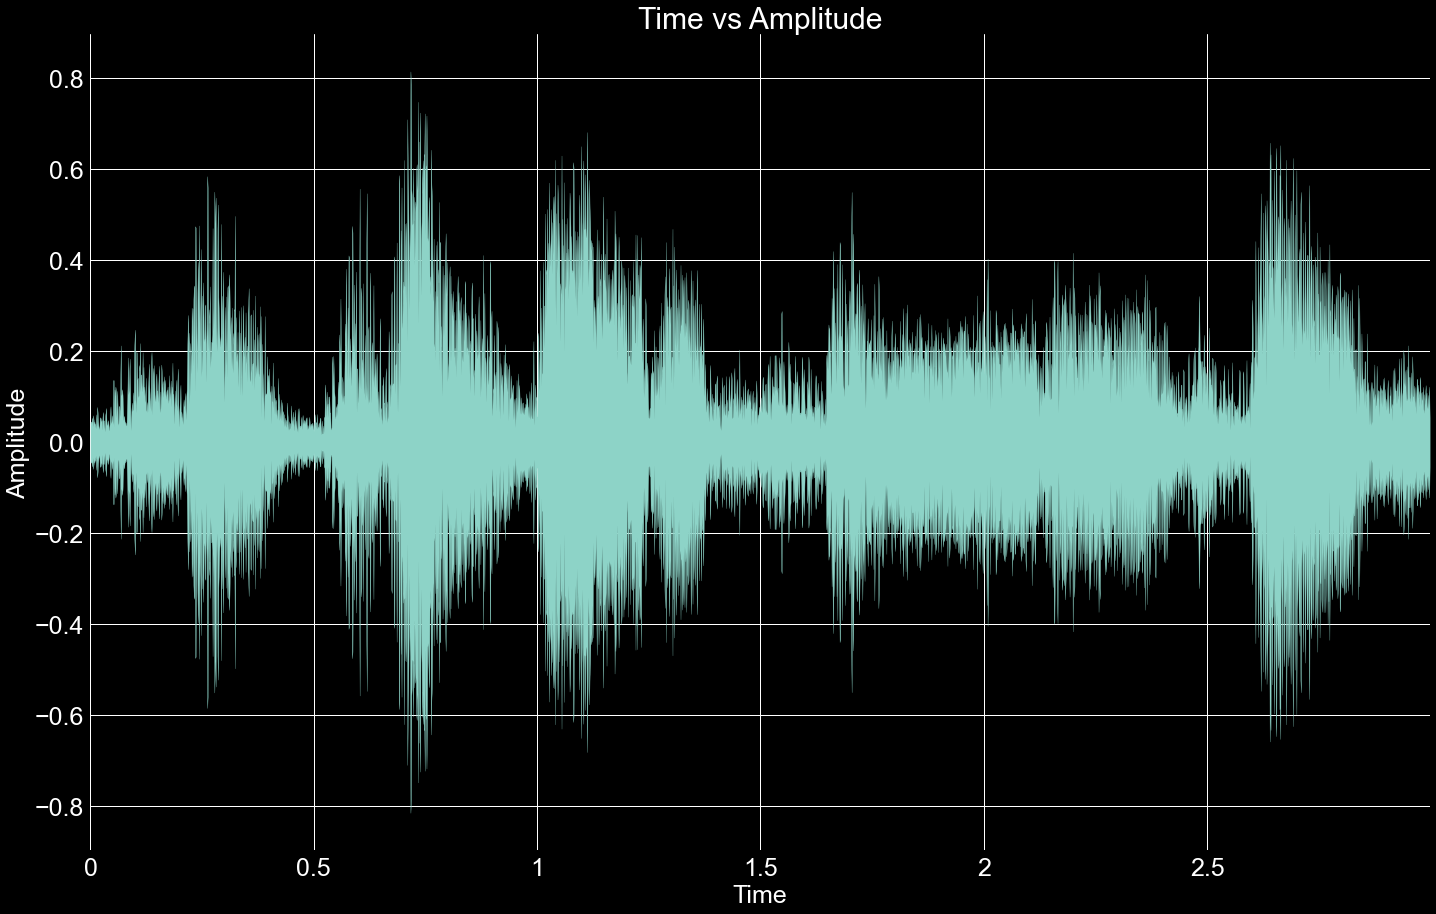

In [42]:
#When audio is first loaded in it is Amplitude vs Time
plt.rc('axes', titlesize=30)
plt.rc('axes', labelsize=25)
plt.rc('xtick', labelsize=25)
plt.rc('ytick', labelsize=25) 
plt.figure(figsize=(24,15))
librosa.display.waveplot(signal)
plt.ylabel("Amplitude")
plt.title("Time vs Amplitude")

In [14]:
#fourier Transform will change our audio signal from Time vs Amp to Frequency vs Amp
fft1=np.fft.fft(signal)
fft2=np.fft.fft(signal2)
fft3=np.fft.fft(signal3)
fft4=np.fft.fft(signal4)
fft5=np.fft.fft(signal5)
fft6=np.fft.fft(signal6)
fft7=np.fft.fft(signal7)
fft8=np.fft.fft(signal8)
fft9=np.fft.fft(signal9)
fft10=np.fft.fft(signal10)

In [15]:
#Fourier Transform gives us back complex numbers so we use abs to get back real numbers
mag1=np.abs(fft1)
mag2=np.abs(fft2)
mag3=np.abs(fft3)
mag4=np.abs(fft4)
mag5=np.abs(fft5)
mag6=np.abs(fft6)
mag7=np.abs(fft7)
mag8=np.abs(fft8)
mag9=np.abs(fft9)
mag10=np.abs(fft10)

In [16]:
#we will take the log of the amplitude to turn the signal into Frequency vs dBs
mag1=np.log(mag1)
mag2=np.log(mag2)
mag3=np.log(mag3)
mag4=np.log(mag4)
mag5=np.log(mag5)
mag6=np.log(mag6)
mag7=np.log(mag7)
mag8=np.log(mag8)
mag9=np.log(mag9)
mag10=np.log(mag10)

In [17]:
freq1=np.linspace(0,sr,len(mag1))
freq2=np.linspace(0,sr2,len(mag2))
freq3=np.linspace(0,sr3,len(mag3))
freq4=np.linspace(0,sr4,len(mag4))
freq5=np.linspace(0,sr5,len(mag5))
freq6=np.linspace(0,sr6,len(mag6))
freq7=np.linspace(0,sr7,len(mag7))
freq8=np.linspace(0,sr8,len(mag8))
freq9=np.linspace(0,sr9,len(mag9))
freq10=np.linspace(0,sr10,len(mag10))

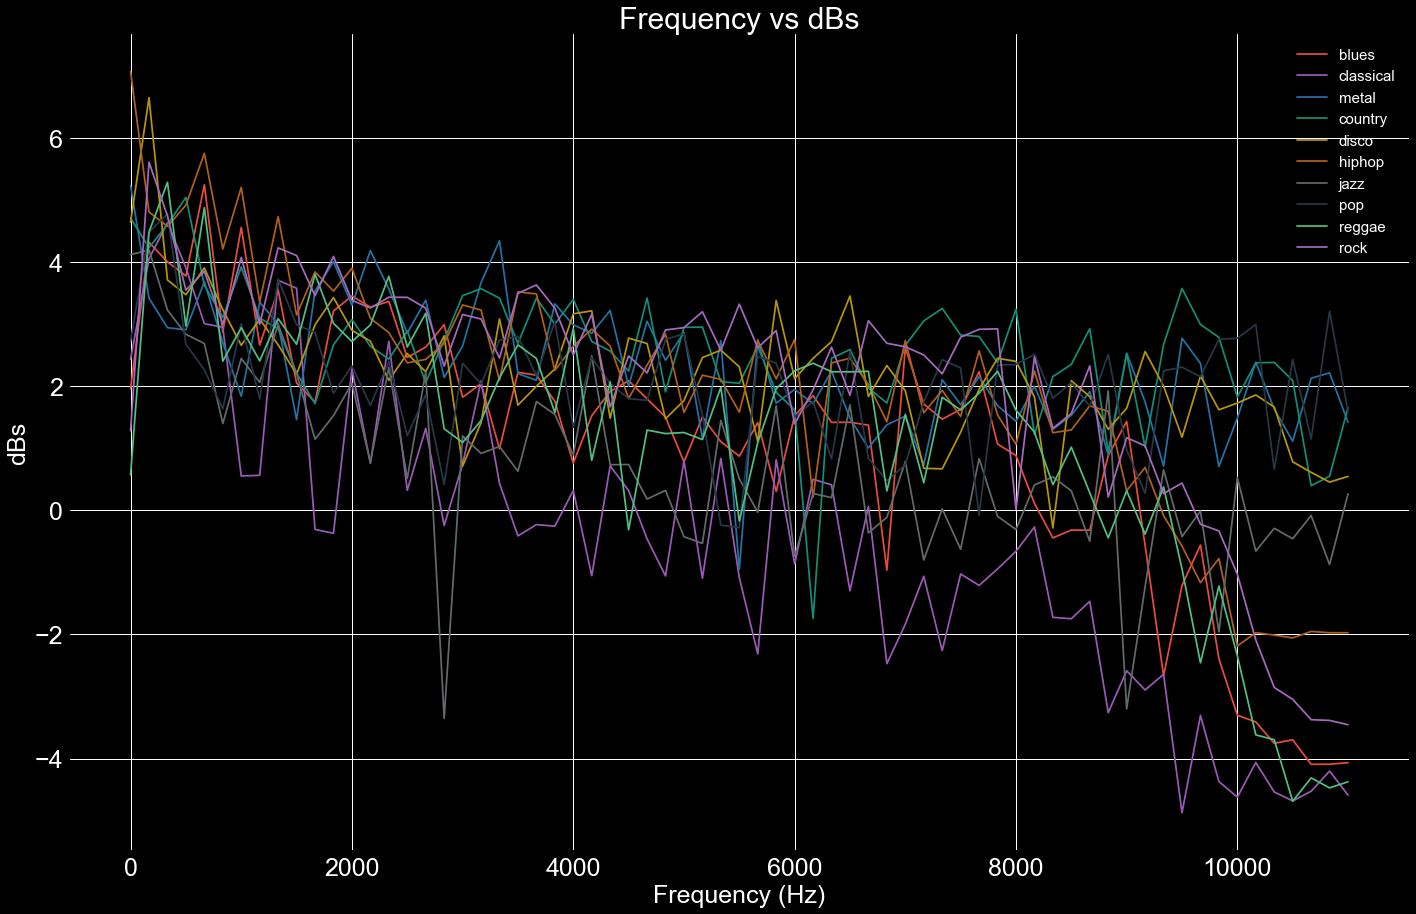

In [43]:
plt.figure(figsize=(24,15))
plt.rc('axes', titlesize=30)
plt.rc('axes', labelsize=25)
plt.rc('xtick', labelsize=25)
plt.rc('ytick', labelsize=25) 
plt.rc('legend', fontsize=25)
plt.plot(freq1[:int(len(mag1)/2):500], mag1[:int(len(mag1)/2):500],color='#E74C3C',label="blues")
plt.plot(freq2[:int(len(mag2)/2):500], mag2[:int(len(mag2)/2):500],color='#9B59B6', label="classical")
plt.plot(freq3[:int(len(mag3)/2):500], mag3[:int(len(mag3)/2):500],color='#2471A3', label="metal")
plt.plot(freq4[:int(len(mag4)/2):500], mag4[:int(len(mag4)/2):500],color='#138D75',label="country")
plt.plot(freq5[:int(len(mag5)/2):500], mag5[:int(len(mag5)/2):500],color='#B7950B', label="disco")
plt.plot(freq6[:int(len(mag6)/2):500], mag6[:int(len(mag6)/2):500],color='#AF601A', label="hiphop")
plt.plot(freq7[:int(len(mag7)/2):500], mag7[:int(len(mag7)/2):500],color='#616A6B',label="jazz")
plt.plot(freq8[:int(len(mag8)/2):500], mag8[:int(len(mag8)/2):500],color='#273746', label="pop")
plt.plot(freq9[:int(len(mag9)/2):500], mag9[:int(len(mag9)/2):500],color='#52BE80', label="reggae")
plt.plot(freq10[:int(len(mag10)/2):500], mag10[:int(len(mag10)/2):500],color='#A569BD', label="rock")
plt.xlabel("Frequency (Hz)")
plt.ylabel("dBs")
plt.legend(prop={'size': 15})
plt.title("Frequency vs dBs")
plt.show()

In [19]:
#here we will take the short-time fourier transform of our signal so that way we can keep time as one of our axis. 
#n_ftt is the number of smaples we take in one frame, hop_length is how many samples we move to get the next frame.
n_fft =2048
hop_length=512
stft=librosa.core.stft(signal, hop_length=hop_length, n_fft=n_fft)
spectrogram=np.abs(stft)**2
log_spectrogram= librosa.power_to_db(spectrogram)

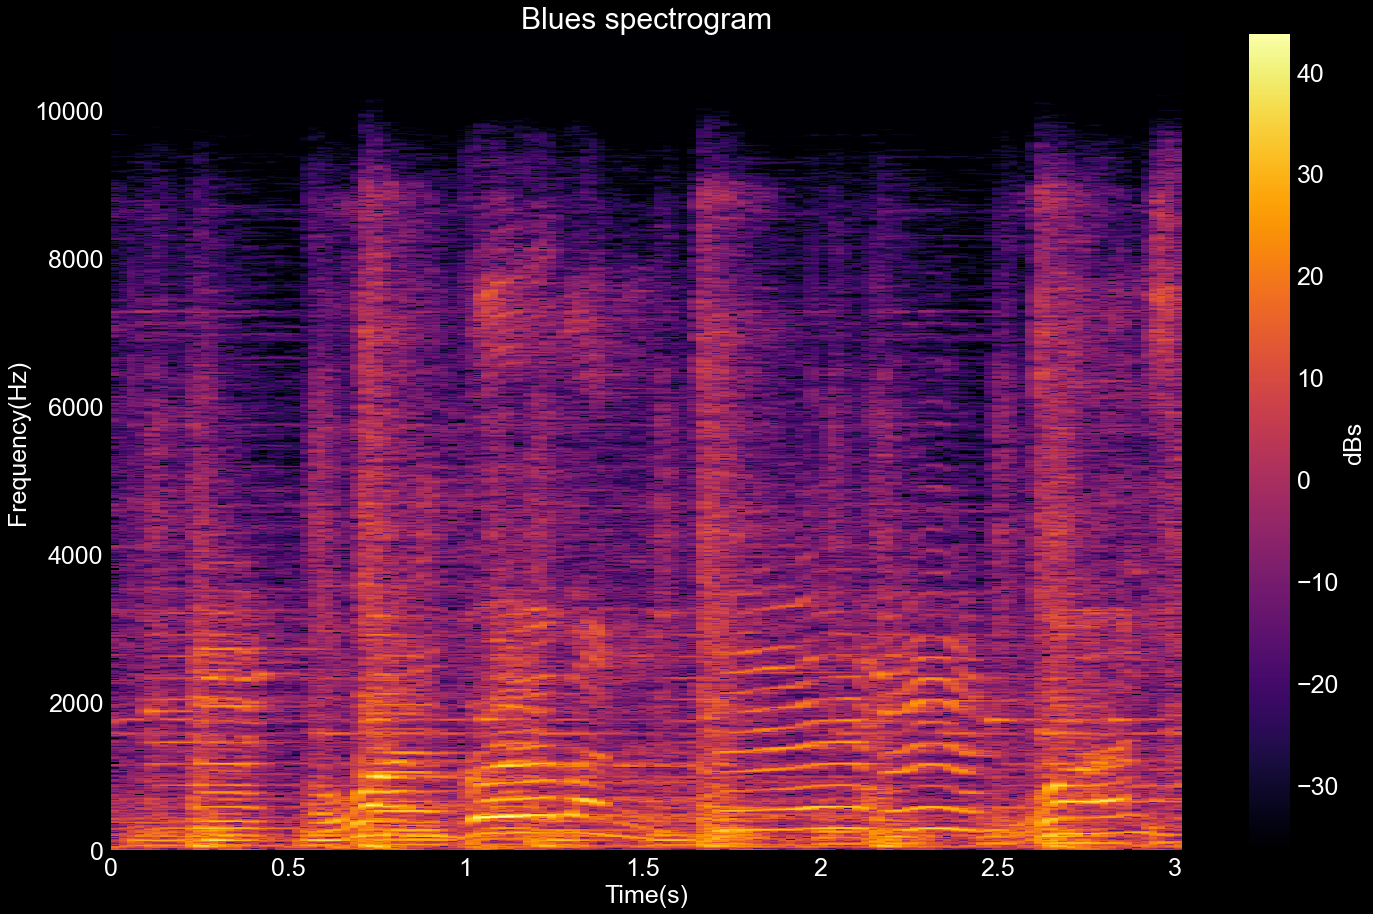

In [44]:
plt.figure(figsize=(24,15))
librosa.display.specshow(log_spectrogram,x_axis="time",y_axis="linear",sr=sr,hop_length=hop_length,cmap="inferno")
plt.xlabel("Time(s)")
plt.ylabel("Frequency(Hz)")
plt.title("Blues spectrogram")
plt.colorbar(label="dBs")

In [24]:
#MFCC stands for Mel Frequency cepstral Coeiffciets 
#MFCC is a greate way to get data about an audio smaple that closly relates to how humans hear sounds
MFCCs= librosa.feature.mfcc(signal, n_fft=n_fft, hop_length=hop_length,n_mfcc=13)
MFCCs2=librosa.feature.mfcc(signal2, n_fft=n_fft, hop_length=hop_length,n_mfcc=13)
MFCCs3=librosa.feature.mfcc(signal3, n_fft=n_fft, hop_length=hop_length,n_mfcc=13)
MFCCs4= librosa.feature.mfcc(signal4, n_fft=n_fft, hop_length=hop_length,n_mfcc=13)
MFCCs5=librosa.feature.mfcc(signal5, n_fft=n_fft, hop_length=hop_length,n_mfcc=13)
MFCCs6=librosa.feature.mfcc(signal6, n_fft=n_fft, hop_length=hop_length,n_mfcc=13)
MFCCs7= librosa.feature.mfcc(signal7, n_fft=n_fft, hop_length=hop_length,n_mfcc=13)
MFCCs8=librosa.feature.mfcc(signal8, n_fft=n_fft, hop_length=hop_length,n_mfcc=13)
MFCCs9=librosa.feature.mfcc(signal9, n_fft=n_fft, hop_length=hop_length,n_mfcc=13)
MFCCs10= librosa.feature.mfcc(signal10, n_fft=n_fft, hop_length=hop_length,n_mfcc=13)

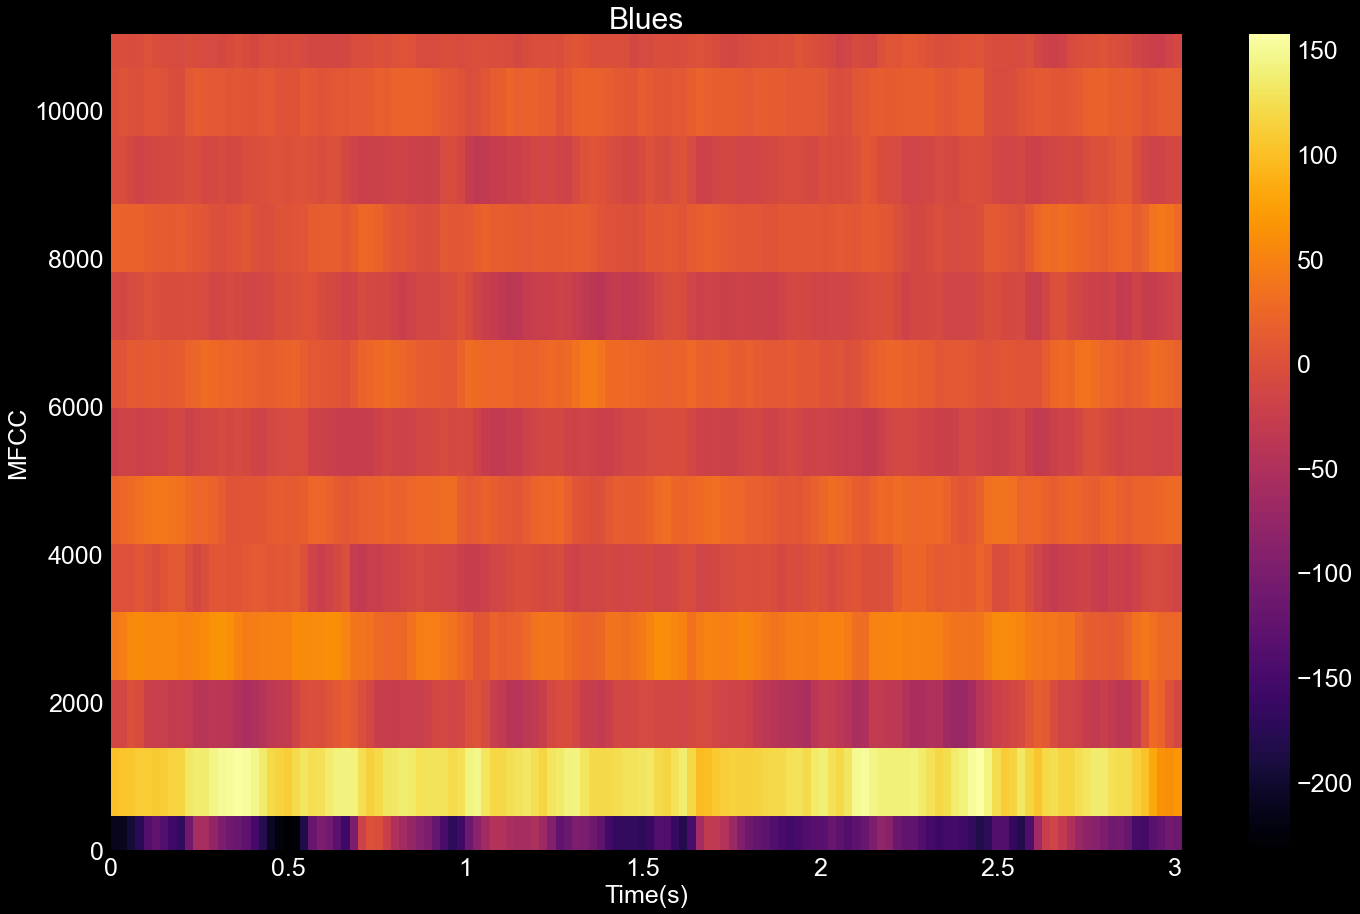

In [45]:
plt.figure(figsize=(24,15))
librosa.display.specshow(MFCCs,x_axis="time",y_axis="linear",sr=sr,hop_length=hop_length,cmap="inferno")
plt.xlabel("Time(s)")
plt.ylabel("MFCC")
plt.title("Blues")
plt.colorbar()

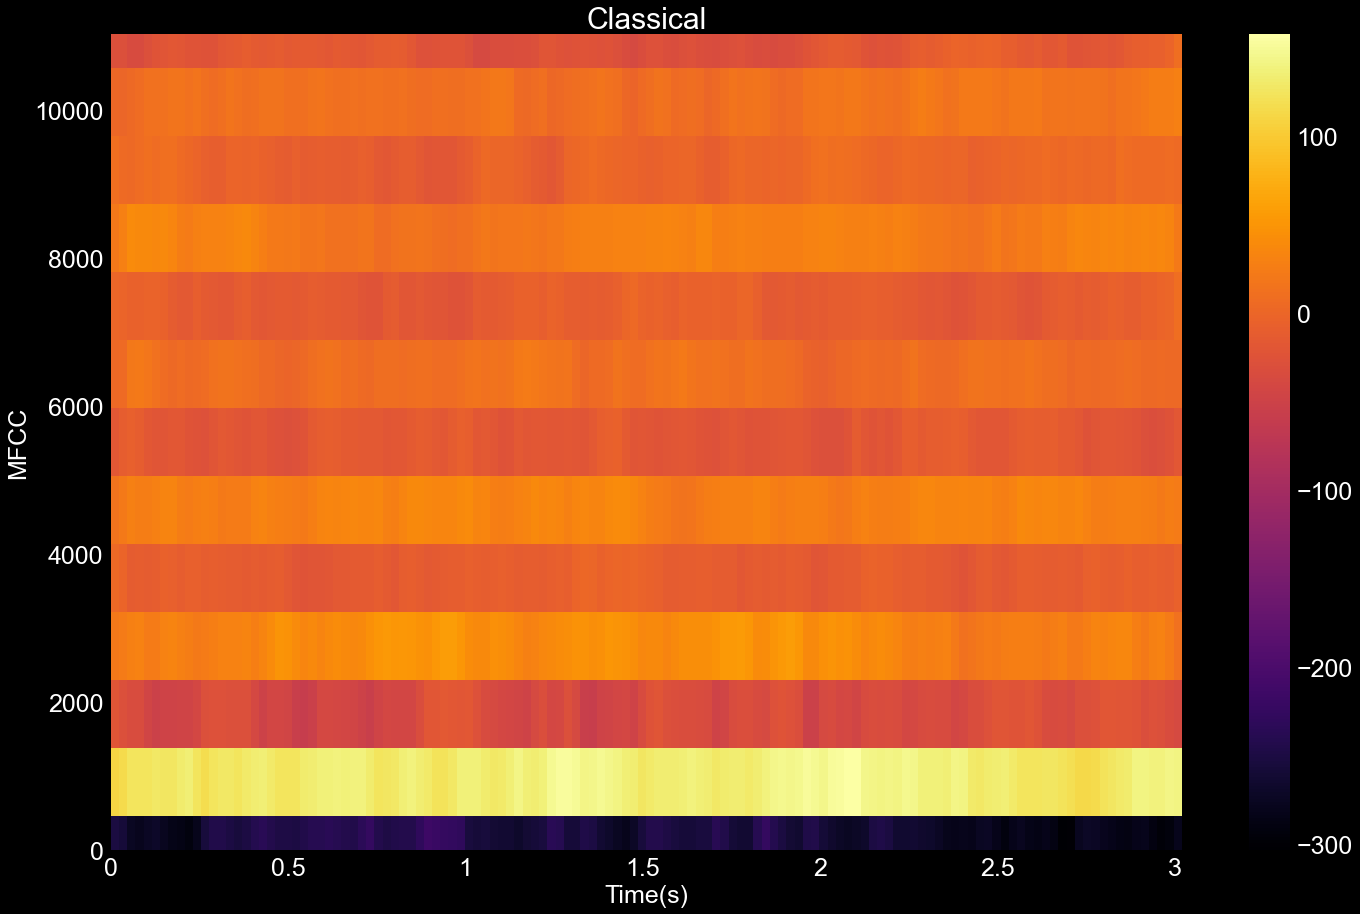

In [46]:
plt.figure(figsize=(24,15))
librosa.display.specshow(MFCCs2,x_axis="time",y_axis="linear",sr=sr,hop_length=hop_length,cmap="inferno")
plt.xlabel("Time(s)")
plt.ylabel("MFCC")
plt.title("Classical")
plt.colorbar()

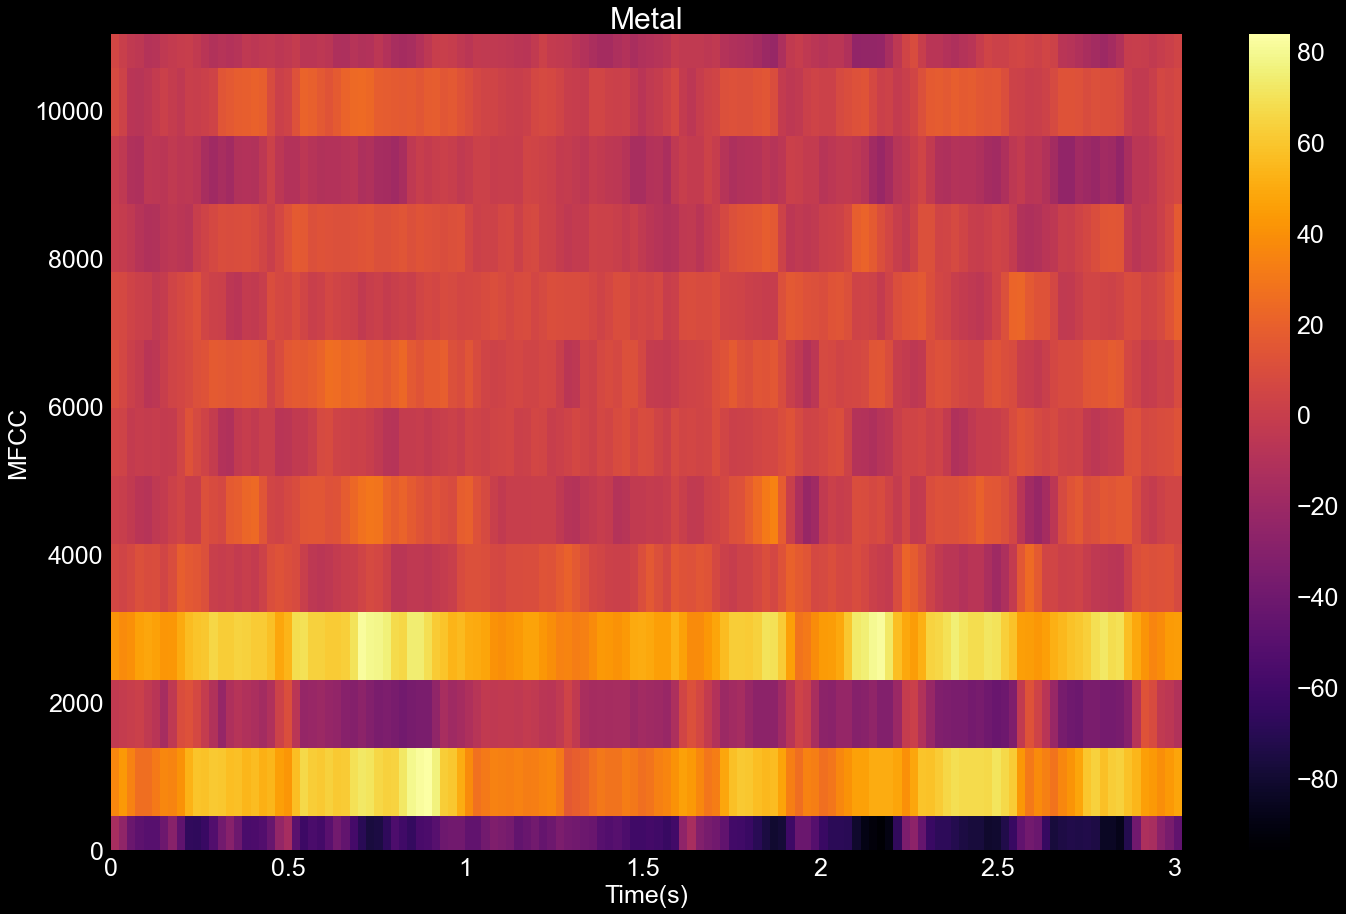

In [47]:
plt.figure(figsize=(24,15))
librosa.display.specshow(MFCCs3,x_axis="time",y_axis="linear",sr=sr,hop_length=hop_length,cmap="inferno")
plt.xlabel("Time(s)")
plt.ylabel("MFCC")
plt.title("Metal")
plt.colorbar()

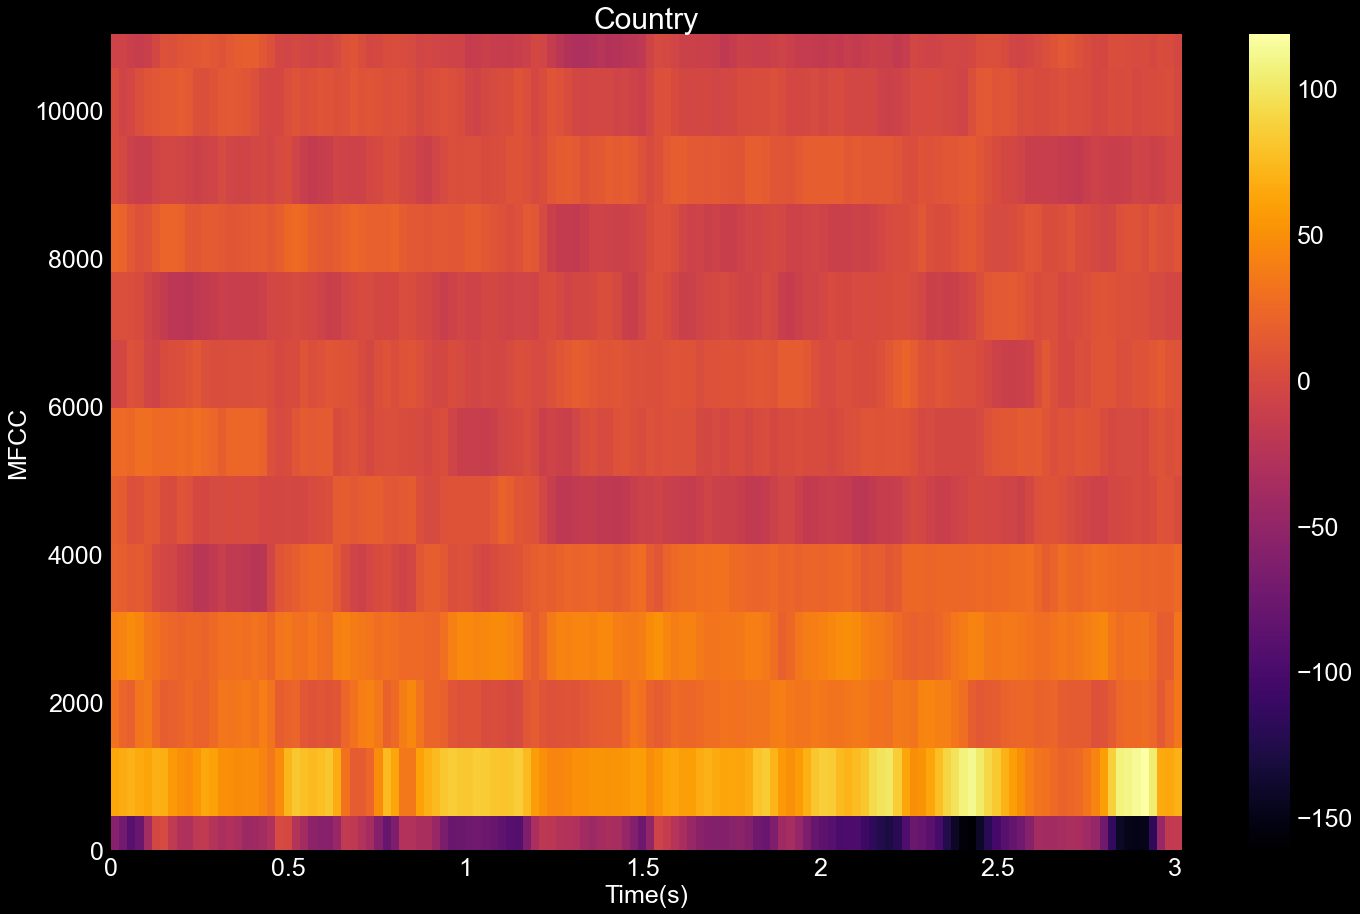

In [48]:
plt.figure(figsize=(24,15))
librosa.display.specshow(MFCCs4,x_axis="time",y_axis="linear",sr=sr,hop_length=hop_length,cmap="inferno")
plt.xlabel("Time(s)")
plt.ylabel("MFCC")
plt.title("Country")
plt.colorbar()

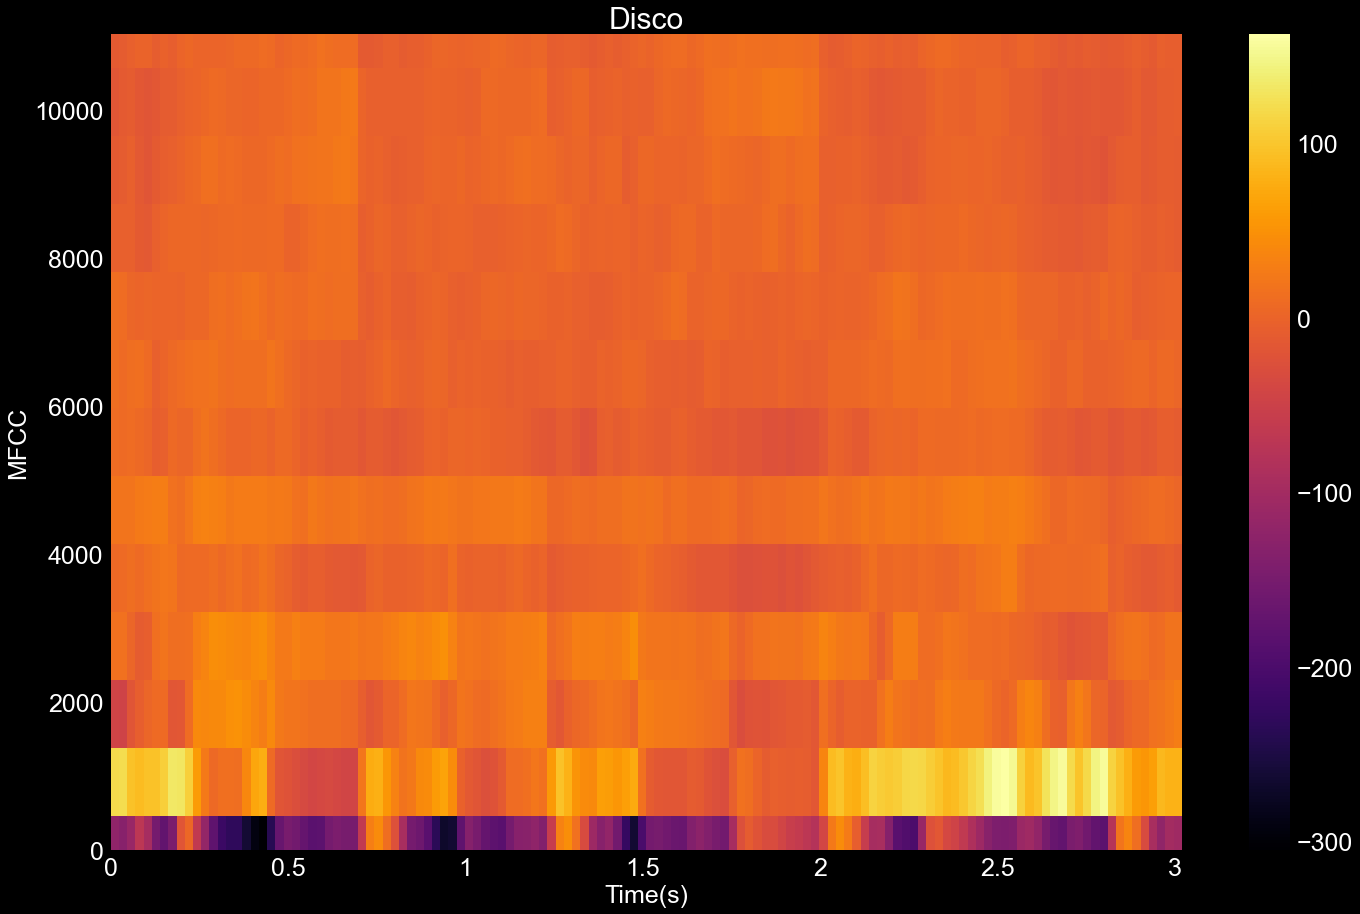

In [49]:
plt.figure(figsize=(24,15))
librosa.display.specshow(MFCCs5,x_axis="time",y_axis="linear",sr=sr,hop_length=hop_length,cmap="inferno")
plt.xlabel("Time(s)")
plt.ylabel("MFCC")
plt.title("Disco")
plt.colorbar()

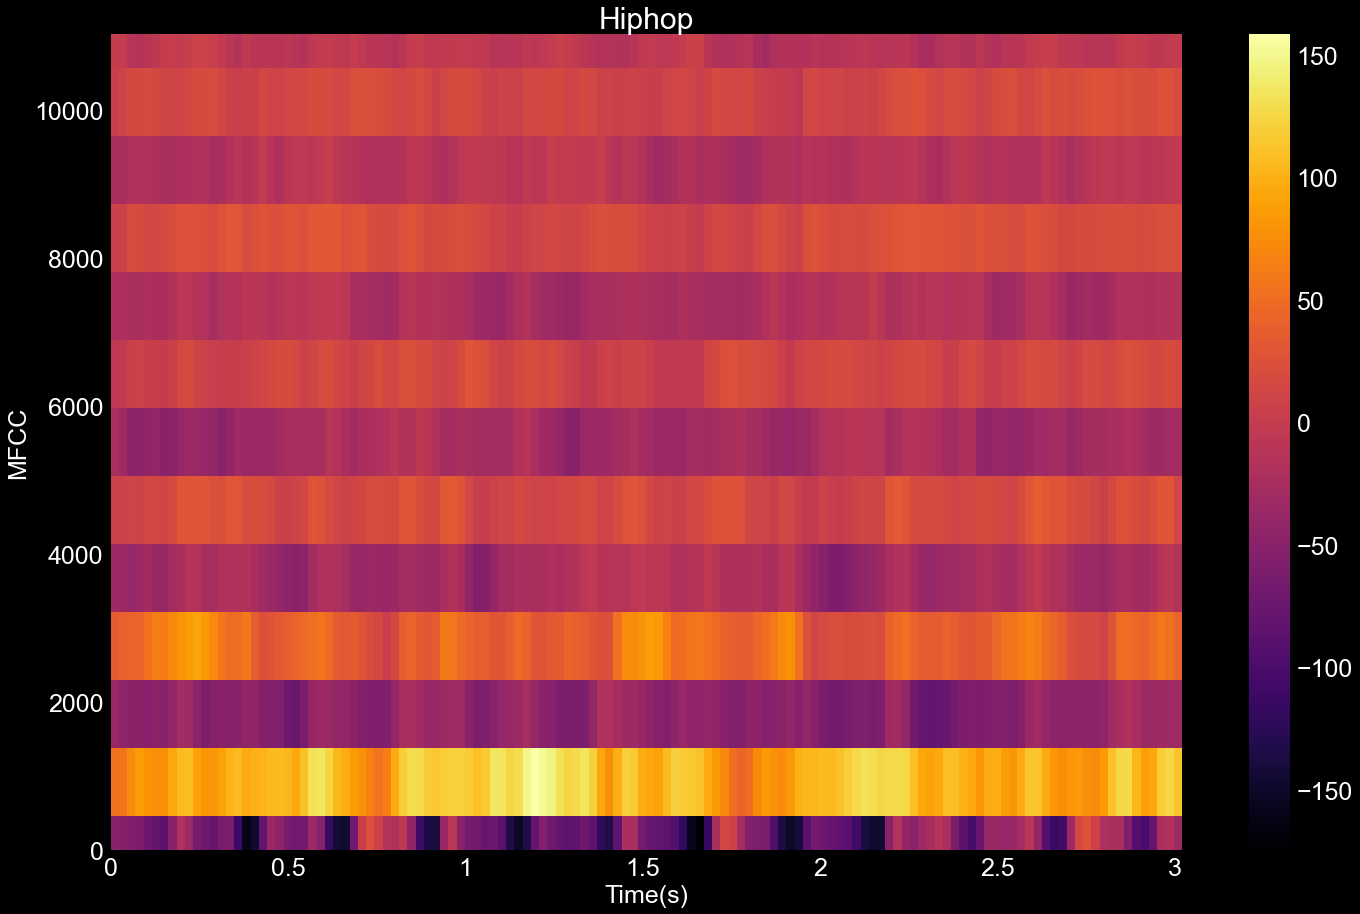

In [50]:
plt.figure(figsize=(24,15))
librosa.display.specshow(MFCCs6,x_axis="time",y_axis="linear",sr=sr,hop_length=hop_length,cmap="inferno")
plt.xlabel("Time(s)")
plt.ylabel("MFCC")
plt.title("Hiphop")
plt.colorbar()

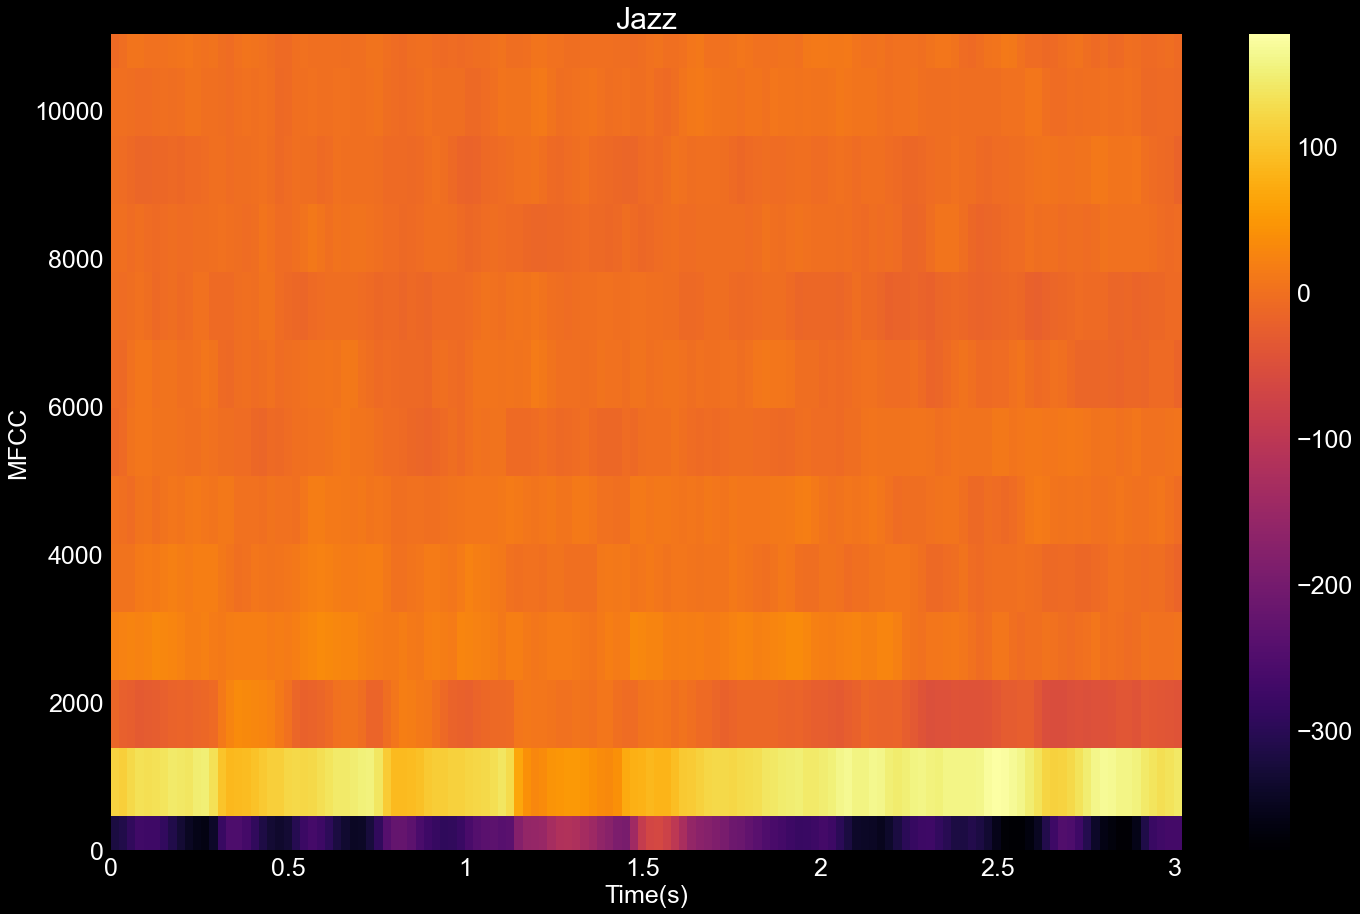

In [51]:
plt.figure(figsize=(24,15))
librosa.display.specshow(MFCCs7,x_axis="time",y_axis="linear",sr=sr,hop_length=hop_length,cmap="inferno")
plt.xlabel("Time(s)")
plt.ylabel("MFCC")
plt.title("Jazz")
plt.colorbar()

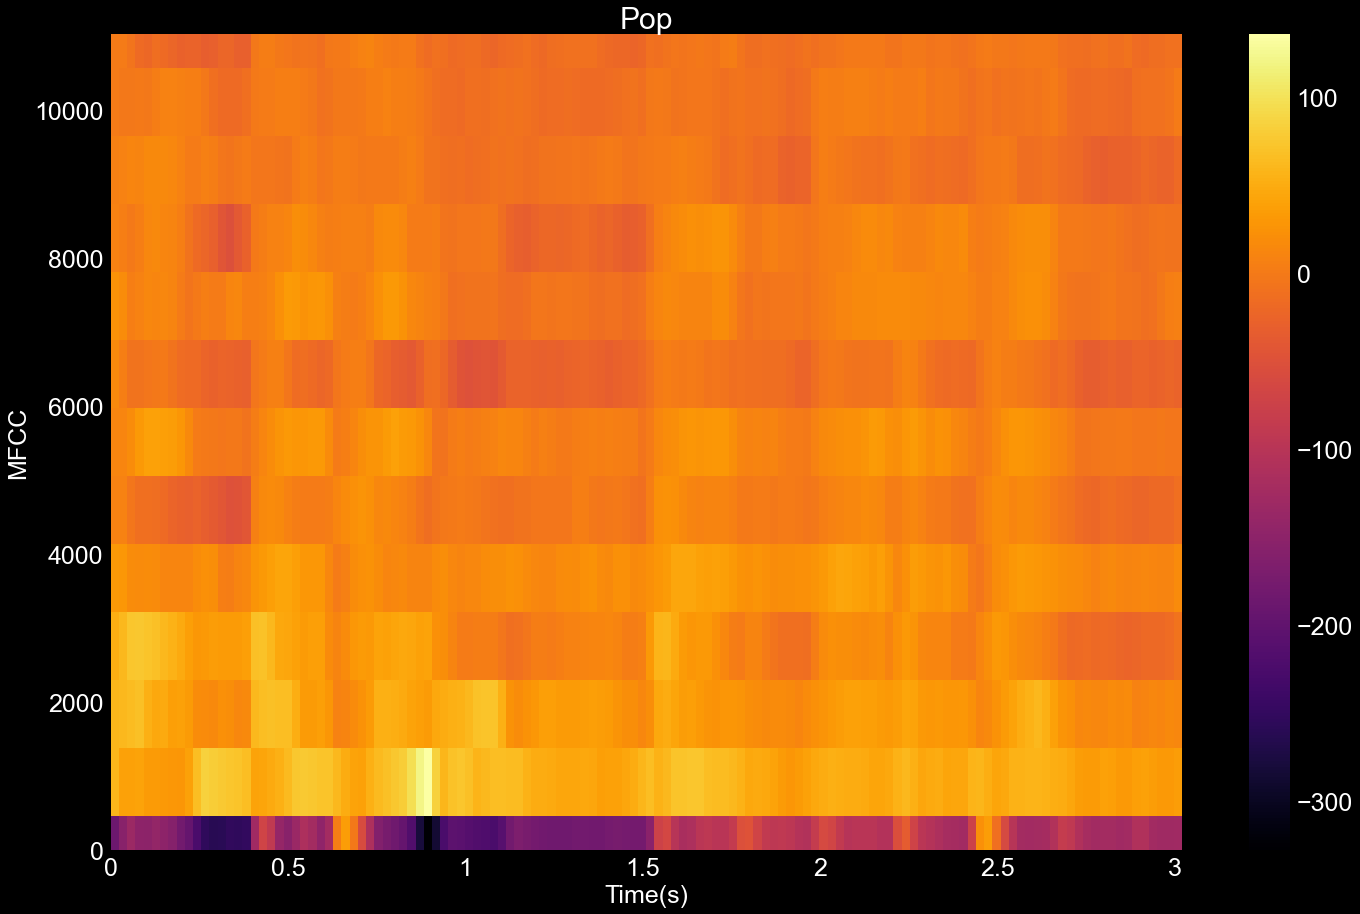

In [52]:
plt.figure(figsize=(24,15))
librosa.display.specshow(MFCCs8,x_axis="time",y_axis="linear",sr=sr,hop_length=hop_length,cmap="inferno")
plt.xlabel("Time(s)")
plt.ylabel("MFCC")
plt.title("Pop")
plt.colorbar()

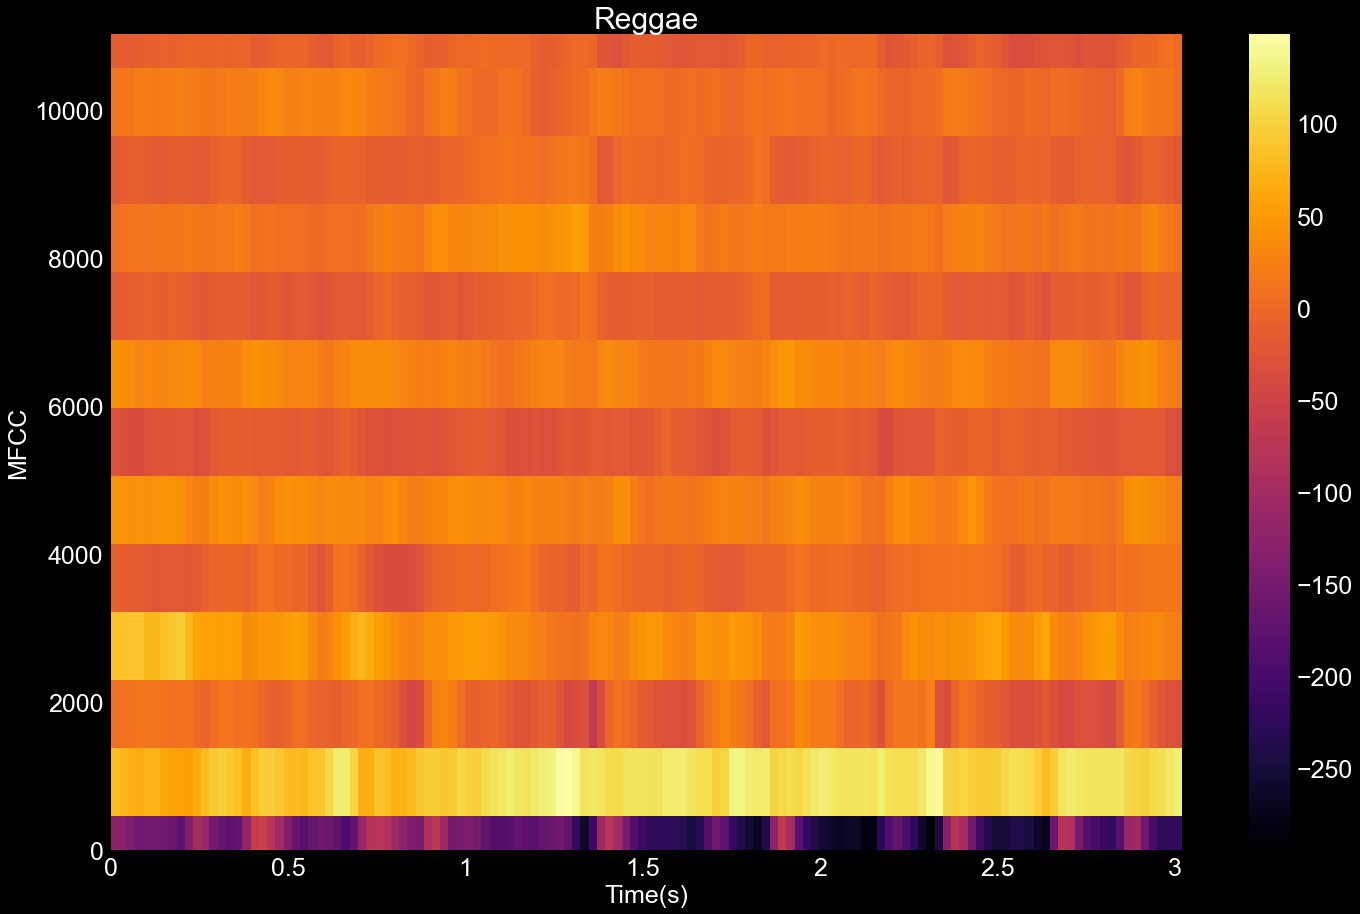

In [53]:
plt.figure(figsize=(24,15))
librosa.display.specshow(MFCCs9,x_axis="time",y_axis="linear",sr=sr,hop_length=hop_length,cmap="inferno")
plt.xlabel("Time(s)")
plt.ylabel("MFCC")
plt.title("Reggae")
plt.colorbar()

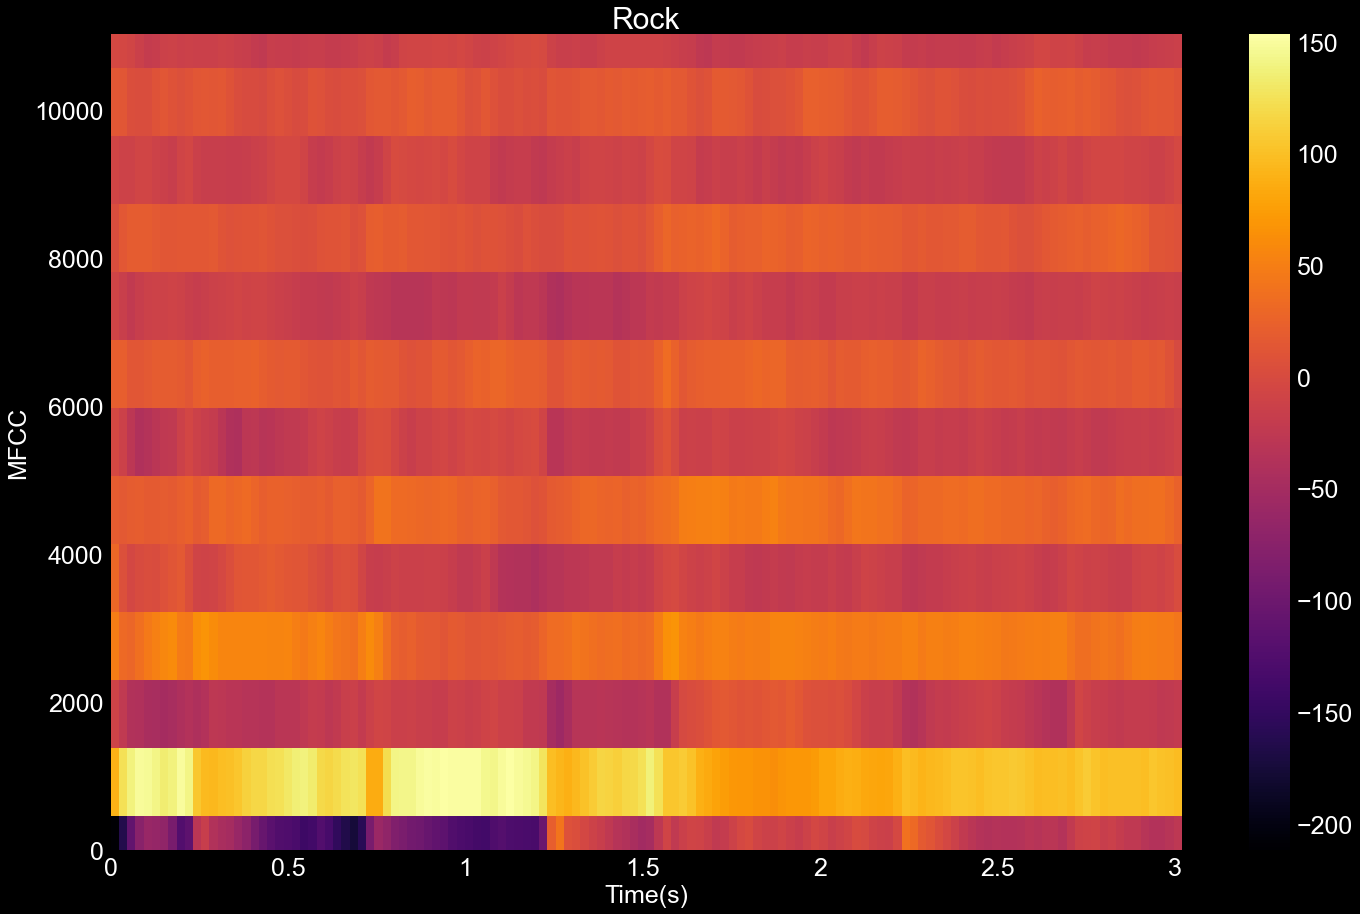

In [54]:
plt.figure(figsize=(24,15))
librosa.display.specshow(MFCCs10,x_axis="time",y_axis="linear",sr=sr,hop_length=hop_length,cmap="inferno")
plt.xlabel("Time(s)")
plt.ylabel("MFCC")
plt.title("Rock")
plt.colorbar()

#As you can tell MFCCs are a seperating factor between each genere